In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re
import random

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,5)

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets = pd.read_csv("../data/train.csv")

In [3]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
tweets["text"].value_counts()

11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...           10
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                                  6
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_        6
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                         6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                     5
VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterranean after a boat carryi...            4
.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; ho

In [4]:
#repeticion_de_palabras
tweets["text"] = tweets["text"].str.lower() #transformo todas las palabras a minuscula
tweets["text"] = tweets["text"].apply(lambda x: re.sub(r'[^\w]', ' ', x)) #quito todos los caracteres no alfanumericos
tweets["text"] = tweets["text"].apply(lambda x: re.sub(r'_', ' ', x))
tweets["text"] = tweets["text"].apply(lambda x: re.sub(r'[0-9]',' ', x)) #quito los caracteres numericos
tweets["text"] = tweets["text"].apply(lambda s: re.sub(r'\b\w{1}\b', '', s)) #quito las letras sueltas
tweets["text"] = tweets["text"].apply(lambda x: re.sub(' +',' ', x)) #quito los espacios de mas
tweets.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,two giant cranes holding bridge collapse into ...,1
7609,10870,NaN,NaN,aria ahrary thetawniest the out of control wi...,1
7610,10871,NaN,NaN,utc km of volcano hawaii http co zdtoyd ebj,1
7611,10872,NaN,NaN,police investigating after an bike collided wi...,1
7612,10873,NaN,NaN,the latest more homes razed by northern califo...,1


In [5]:
tweets["words_count"] = tweets["text"].str.split(' ').apply(lambda x: len(x))
tweets.head()

,id,keyword,location,text,target,words_count
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,13
1,4,NaN,NaN,forest fire near la ronge sask canada,1,7
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,22
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,9
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,16


Text(0.5, 0, 'Cantidad de palabras')

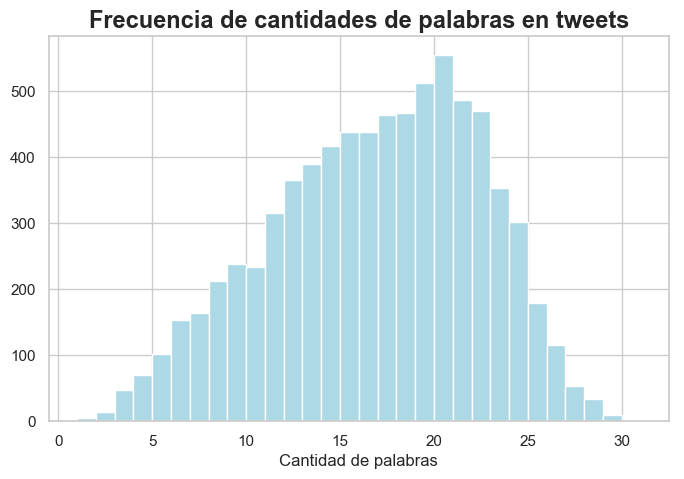

In [15]:
tweets["words_count"].hist(bins=30, color="lightblue")
plt.title("Frecuencia de cantidades de palabras en tweets", fontsize=17, fontweight="bold")
plt.xlabel("Cantidad de palabras", fontsize=12)

In [7]:
tweets["keyword"] = tweets["keyword"].str.replace('%20',' ')

In [8]:
tweets_falsos = tweets[tweets["target"]==0]
tweets_verdaderos = tweets[tweets["target"]==1]

Text(0.5, 0, 'Cantidad de palabras')

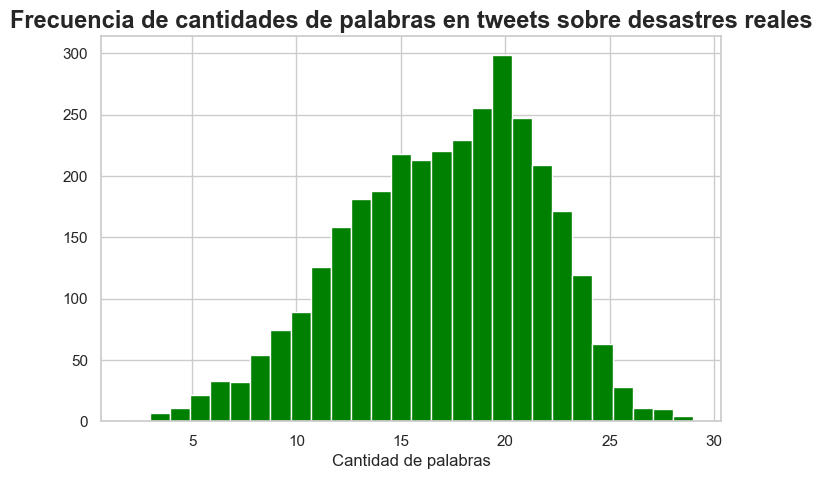

In [9]:
tweets_verdaderos["words_count"].hist(bins=28, color="green")
plt.title("Frecuencia de cantidades de palabras en tweets sobre desastres reales", fontsize=17, fontweight="bold")
plt.xlabel("Cantidad de palabras", fontsize=12)

Text(0.5, 0, 'Cantidad de palabras')

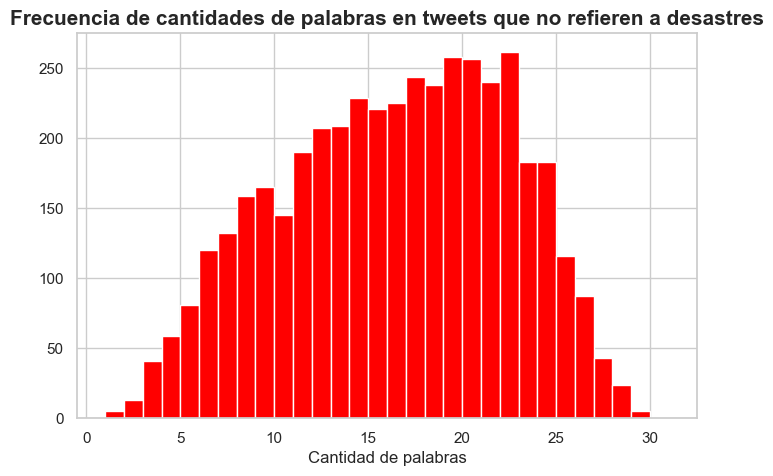

In [12]:
tweets_falsos["words_count"].hist(bins=30, color="red")
plt.title("Frecuencia de cantidades de palabras en tweets que no refieren a desastres", fontsize=15, fontweight="bold")
plt.xlabel("Cantidad de palabras", fontsize=12)

Text(0.5, 0, 'Cantidad de palabras')

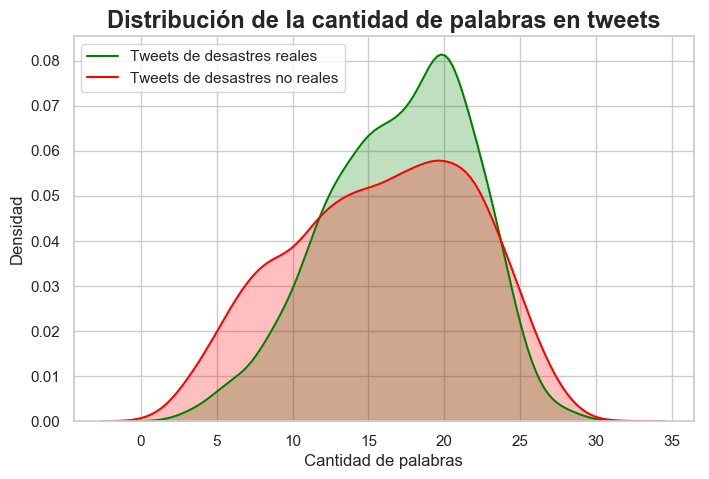

In [13]:
g = sns.kdeplot(tweets_verdaderos["words_count"], color="green", label="Tweets de desastres reales", shade=True)
g = sns.kdeplot(tweets_falsos["words_count"], color="red", label="Tweets de desastres no reales", shade=True)
g.set_title("Distribución de la cantidad de palabras en tweets", fontsize=17, fontweight="bold")
g.set_ylabel("Densidad", fontsize=12)
g.set_xlabel("Cantidad de palabras", fontsize=12)

In [13]:
#poner estadisticas de cantidad de palabras (agrupando por target) por ejemplo la suma y mostrar esa suma con un barplot por target
#poner esto antes de ver las palabras en el wordcloud
grouped_by_target = tweets.groupby(["target"]).agg({"words_count":["sum","max","min","mean"]})
grouped_by_target.rename(columns={"words_count":"valor"}, inplace=True)
grouped_by_target.stack()

valor
target                          
0      max                 31.00
       mean                15.92
       min                  1.00
       sum             69,108.00
1      max                 29.00
       mean                17.05
       min                  2.00
       sum             55,784.00

Text(0, 0.5, 'Cantidad de palabras')

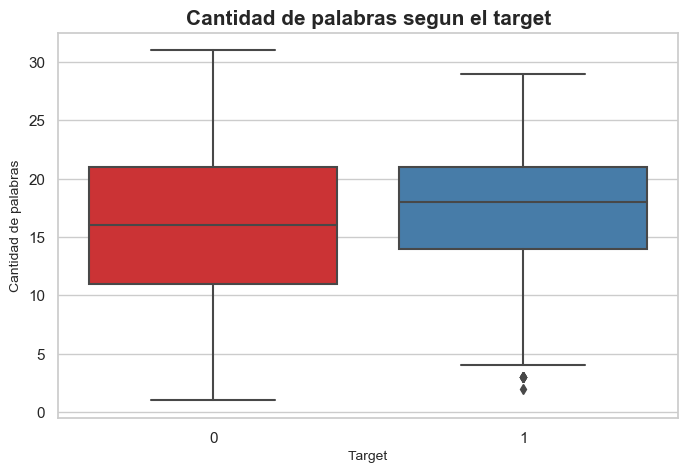

In [18]:
g = sns.boxplot(x="target", y="words_count", data= tweets, palette="Set1")
g.set_title("Cantidad de palabras segun el target", fontsize=15, fontweight="bold")
g.set_xlabel("Target", fontsize=10)
g.set_ylabel("Cantidad de palabras", fontsize=10)

In [59]:
#Miro cantidad de palabras por keyword
tweets_con_keywords = tweets[~tweets["keyword"].isnull()]
print(len(tweets_con_keywords))
tweets_con_keywords.head(10)

7552


,id,keyword,location,text,text_length,target,words_count
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze http lhyxeohy,50,1,9
32,49,ablaze,Est. September 2012 - Bristol,always try bring the heavy metal http yao xngw,58,0,13
33,50,ablaze,AFRICA,africanbaze breaking news nigeria flag set ab...,75,1,13
34,52,ablaze,"Philadelphia, PA",crying out for more set ablaze,33,0,7
35,53,ablaze,"London, UK",plus side look the sky last night was ablaze ...,71,0,16
36,54,ablaze,Pretoria,phdsquares mufc they built much hype around n...,119,0,23
37,55,ablaze,World Wide!!,inec office abia set ablaze http imaomknna,48,1,9
38,56,ablaze,NaN,barbados bridgetown jamaica two cars set ablaz...,125,1,22
39,57,ablaze,Paranaque City,ablaze for you lord,20,0,5
40,59,ablaze,Live On Webcam,check these out http roi nsmejj http zjin http...,92,0,19


In [60]:
top10_keywords = tweets["keyword"].value_counts().head(10).index.tolist()
top10_keywords

['fatalities',
 'armageddon',
 'deluge',
 'body bags',
 'sinking',
 'damage',
 'harm',
 'evacuate',
 'outbreak',
 'collided']

In [61]:
tweets_top10_keywords = tweets[tweets["keyword"].isin(top10_keywords)]
tweets_top10_keywords["keyword"].value_counts()

fatalities    45
deluge        42
armageddon    42
harm          41
body bags     41
sinking       41
damage        41
collided      40
outbreak      40
evacuate      40
Name: keyword, dtype: int64

In [62]:
grouped = tweets_top10_keywords.groupby(["keyword","target"]).agg({"words_count":["sum","max","min"]})
grouped

words_count        
                          sum max min
keyword    target                    
armageddon 0              588  27   3
           1               76  23   5
body bags  0              651  26   4
           1               19  19  19
collided   0              320  29   5
           1              446  24  11
damage     0              340  28   5
           1              299  28   5
deluge     0              651  28   7
           1              120  25  10
evacuate   0              222  24   5
           1              450  27  10
fatalities 0              307  23   8
           1              468  25  10
harm       0              672  27   7
           1               89  26  17
outbreak   0               24  24  24
           1              767  25  12
sinking    0              596  28   4
           1              154  24  12

[Text(0, 0, 'armageddon'),
 Text(0, 0, 'body bags'),
 Text(0, 0, 'collided'),
 Text(0, 0, 'damage'),
 Text(0, 0, 'deluge'),
 Text(0, 0, 'evacuate'),
 Text(0, 0, 'fatalities'),
 Text(0, 0, 'harm'),
 Text(0, 0, 'outbreak'),
 Text(0, 0, 'sinking')]

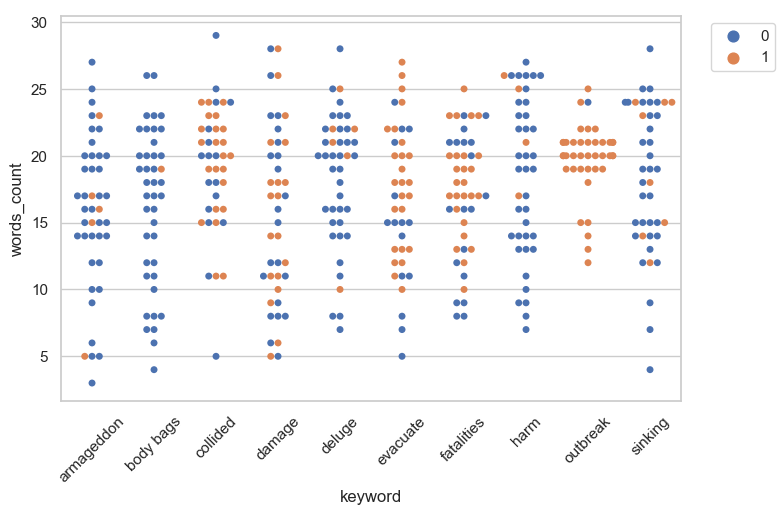

In [63]:
ax = sns.swarmplot(x="keyword", y="words_count", hue="target", data=tweets_top10_keywords)
ax.legend(loc="upper center", bbox_to_anchor=(1.1,1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [16]:
#agrego la columna de la longitud del texto
tweets.insert(loc=tweets.columns.get_loc("text")+1, column="text_length", value= tweets["text"].str.len())
tweets.head()

,id,keyword,location,text,text_length,target,words_count
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,68,1,13
1,4,NaN,NaN,forest fire near la ronge sask canada,37,1,7
2,5,NaN,NaN,all residents asked to shelter in place are be...,130,1,22
3,6,NaN,NaN,people receive wildfires evacuation orders in...,58,1,9
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,84,1,16


In [17]:
list_stopwords = ["the","and","you","for","that","with","this","from","are","have","was","like","but","just","not","your",\
                 "all","after","will","can","has","when","they","get","new","now","what","amp","","http","https","out",\
                 "more","about","how","there","don","over","into","than","would","been","her","who","were","some","still",\
                 "his","back","why","them","got","know","had","see","going","our","htt","via","nws","wait",\
                 "hwy","top","both","hah","haha","getting","far","near"]

In [18]:
tweets["text"] = tweets["text"].apply(lambda s: re.sub(r'\b\w{1,2}\b', '', s)) #quito las palabras cortas
tweets["text"] = tweets["text"].apply(lambda x: re.sub(' +',' ', x))
tweets.loc[:,["text"]].tail()

,text
7608,two giant cranes holding bridge collapse into ...
7609,aria ahrary thetawniest the out control wild ...
7610,utc volcano hawaii http zdtoyd ebj
7611,police investigating after bike collided with ...
7612,the latest more homes razed northern californi...


In [19]:
tweets_falsos = tweets[tweets["target"]==0]
tweets_verdaderos = tweets[tweets["target"]==1]

In [53]:
def twitter_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(5, 100%%, %d%%)" % random.randint(60,100)

In [55]:
def twitter_color_func2(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(125, 100%%, %d%%)" % random.randint(60,100)

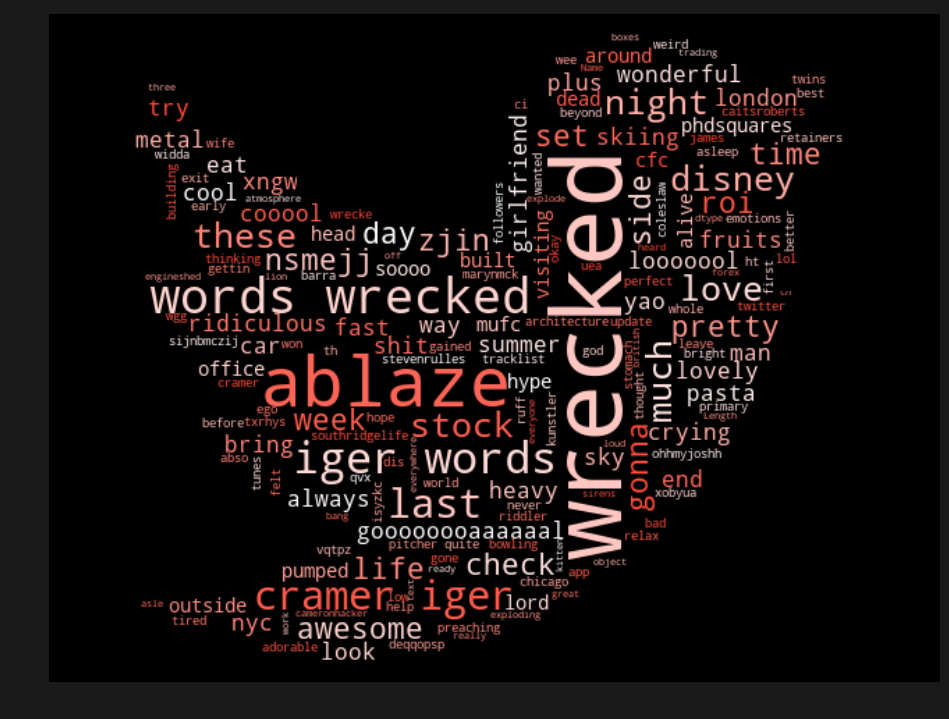

In [54]:
#palabras mas usadas en tweets no tienen que ver con desastres reales
mask = np.array(Image.open("../data/Twitter-Logo.jpg"))
wordcloud = WordCloud(width = 500, height = 500, min_font_size = 5, max_font_size = 70, max_words = 1000, 
                      background_color = 'black', mask= mask, stopwords = list_stopwords).\
                        generate(str(tweets_falsos["text"]))
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k')
plt.imshow(wordcloud.recolor(color_func = twitter_color_func, random_state=3), interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

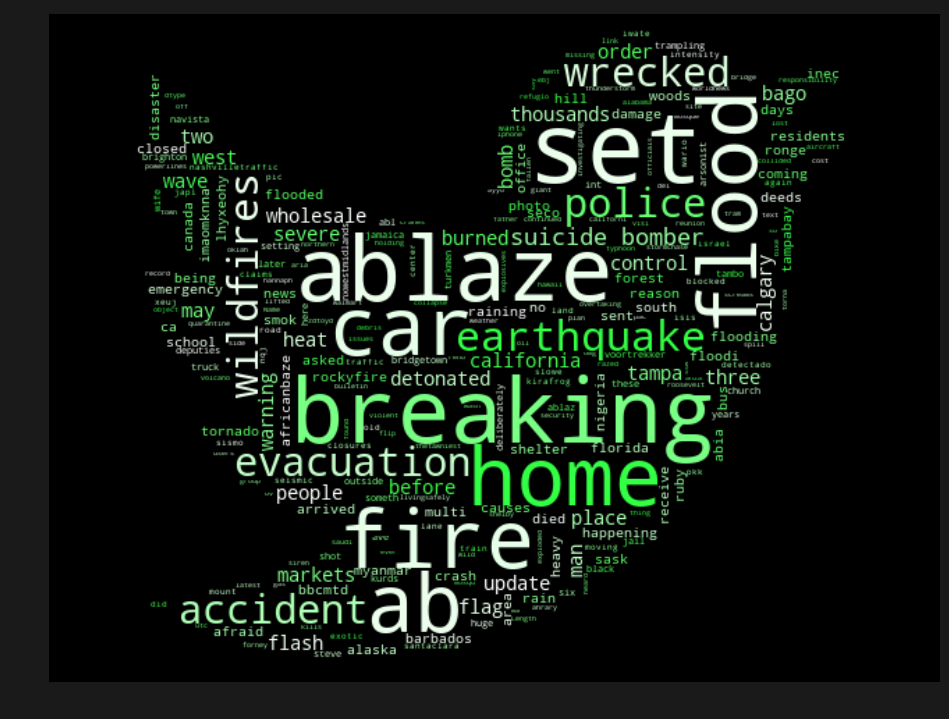

In [56]:
#palabras mas usadas en tweets no tienen que ver con desastres reales
mask = np.array(Image.open("../data/Twitter-Logo.jpg"))
wordcloud = WordCloud(width = 500, height = 500, min_font_size = 5, max_font_size = 70, max_words = 1000, 
                      background_color = 'black', mask= mask, stopwords = list_stopwords).\
                        generate(str(tweets_verdaderos["text"]))
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k')
plt.imshow(wordcloud.recolor(color_func = twitter_color_func2, random_state=3), interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [7]:
#evaluaremos la relacion entre la longitud del tweet y la cantidad de palabras del mismo
tweets.loc[:,["text","text_length","words_count"]].sort_values(by="text_length", ascending=False).head(10)

,text,text_length,words_count
5096,we want to see no more hiroshima and nagasaki ...,142,25
5379,savs contact fell out but she was convinced it...,141,27
7460,icymagistrate ûóher upper arm ûò those friggi...,141,24
1333,the mv should just be them strutting like they...,140,27
6255,lrt refer to the lyrics to hear big boi explai...,140,28
4943,lt meltdown of proportions commences manage t...,140,28
2272,doone silver architects has won permission to ...,139,23
3836,after shooting event at the theater starbucks ...,139,20
4815,the media needs to stop publicizing mass murde...,139,28
6644,the pak terrorist who has been caught alive mu...,139,26


In [8]:
tweets.loc[:,["text","text_length","words_count"]].sort_values(by="words_count", ascending=False).head(10)

,text,text_length,words_count
3859,chose you so if we can search for the joy of ...,138,31
7450,fevwarrior in the vault that could take look ...,132,29
7220,sorry but if you have to resort to weapons to...,133,29
1831,this guy bought my car on tuesday police knock...,132,29
1727,drob collided into dan hughes while she was go...,133,29
1565,leezy its like you re about to fall down clif...,128,29
965,tr jdavis bruh you wanna fight down meet me i...,130,29
945,princessduck last week wanted the th sense to...,132,29
6005,ollymursaus do feel sorry for him he is not p...,126,29
1619,spot fixing match fixing anyone or it has to b...,130,29


Text(0, 0.5, 'Cantidad de palabras')

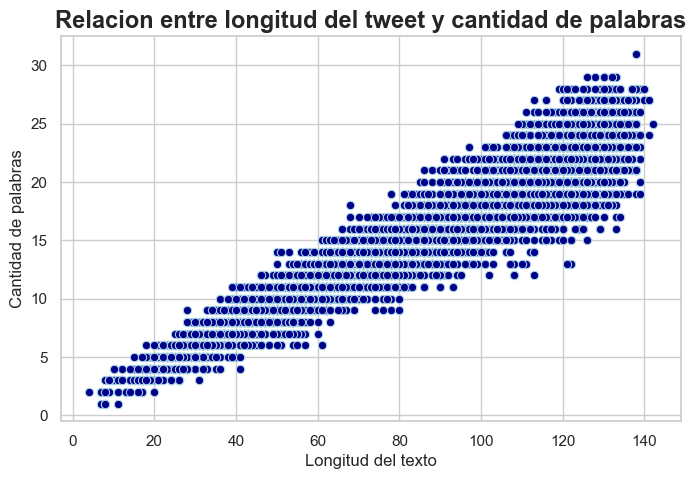

In [38]:
g = sns.scatterplot(x="text_length", y="words_count", data=tweets, color="darkblue", edgecolor="lightblue")
g.set_title("Relacion entre longitud del tweet y cantidad de palabras", fontsize=17, fontweight="bold")
g.set_xlabel("Longitud del texto", fontsize=12)
g.set_ylabel("Cantidad de palabras", fontsize=12)

Text(0, 0.5, 'Cantidad de palabras')

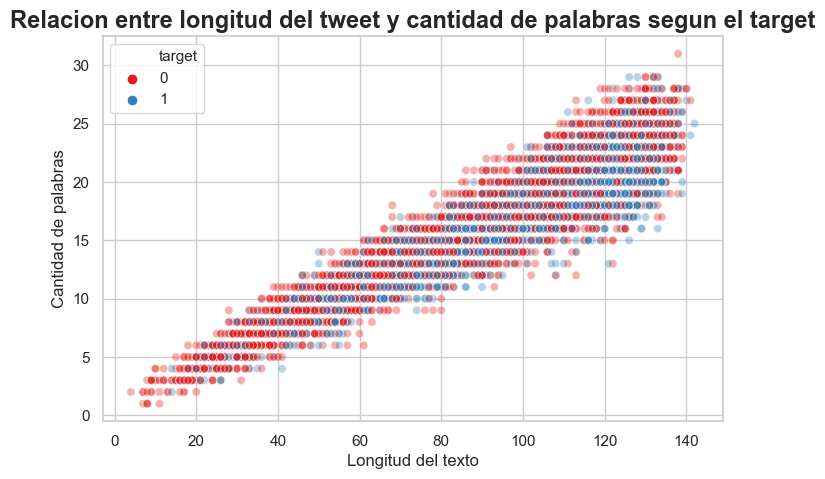

In [24]:
g = sns.scatterplot(x="text_length", y="words_count", hue="target", data=tweets, palette="Set1", alpha=0.35)
g.set_title("Relacion entre longitud del tweet y cantidad de palabras segun el target", fontsize=17, fontweight="bold")
g.set_xlabel("Longitud del texto", fontsize=12)
g.set_ylabel("Cantidad de palabras", fontsize=12)

Text(0, 0.5, 'Cantidad de palabras')

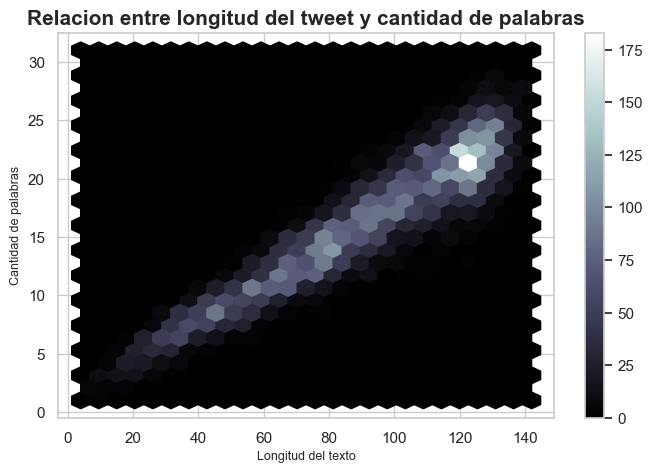

In [52]:
ax = tweets.plot.hexbin(x="text_length", y="words_count", gridsize=25, cmap="bone")
ax.set_title("Relacion entre longitud del tweet y cantidad de palabras", fontsize=15, fontweight="bold")
ax.set_xlabel("Longitud del texto", fontsize=9)
ax.set_ylabel("Cantidad de palabras", fontsize=9)

In [10]:
tweets_con_locations = tweets[~tweets["location"].isnull()]

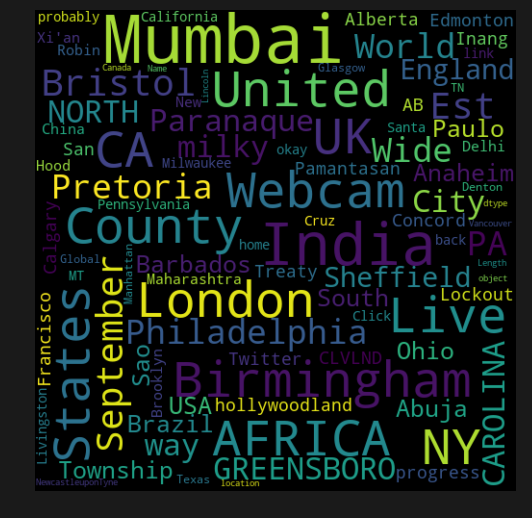

In [12]:
#repeticiones de palabras en la columna LOCATION
wordcloud = WordCloud(width = 500, height = 500, min_font_size = 5, max_font_size = 70, max_words = 100, 
                      background_color = 'black', stopwords = STOPWORDS).generate(str(tweets_con_locations["location"]))
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
tweets["text"] = tweets["text"].str.lower()                                  #convierto todas las letras a minuscula
tweets["text"] = tweets["text"].apply(lambda x: re.sub(r'[^\w]', ' ', x))    #remuevo todos los caracteres no alfanumericos
tweets["text"] = tweets["text"].apply(lambda x: re.sub(r'_', ' ', x))        #remuevo todos los guiones bajo que quedaron
tweets["text"] = tweets["text"].apply(lambda x: re.sub(r'[0-9]',' ', x))     #remuevo los caracteres numericos
tweets["text"] = tweets["text"].apply(lambda s: re.sub(r'\b\w{1}\b', '', s)) #remuevo todas las letras que quedaron sueltas
tweets["text"] = tweets["text"].apply(lambda x: re.sub(' +',' ', x))         #remuevo los espacios de mas

In [12]:
tweets_falsos["words_count"].value_counts()

22    262
19    258
20    257
17    244
21    240
18    238
14    229
16    225
15    221
13    209
12    207
11    190
24    183
23    183
9     165
8     159
10    145
7     132
6     120
25    116
26     87
5      81
4      59
27     43
3      41
28     24
2      13
29      5
1       5
31      1
Name: words_count, dtype: int64

In [15]:
tweets_verdaderos["words_count"].median()

18.0

In [16]:
tweets_falsos["words_count"].median()

16.0